In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [52]:
# Load the data
df = pd.read_csv('apartment_rent_data.csv')
df

,id,title,rent,deposit,total,min_size,max_size,rooms,min_building_age,max_building_age
0,1,اجاره میز برای ناخنکار و ‌مژه کار,3500000,0,116666666,0,9,یک,15,19
1,2,مطهری یوسفیان / ۴۲ متر / تک خواب / بازسازی شده,6000000,500000000,700000000,40,49,یک,10,14
2,3,آپارتمان ۴۰ متری سهروردی,0,600000000,600000000,40,49,یک,15,19
3,4,۴۰ متر نزدیک مترو قدوسی با پارکینگ و اسانسور,10000000,300000000,633333333,40,49,یک,15,19
4,5,۴۵ متر یک خواب طبقه اول شریعتی,9800000,200000000,526666666,40,49,یک,15,19
...,...,...,...,...,...,...,...,...,...,...
529,530,۱۹۲ متر ۳ خوابه نوساز سهروردی شمالی,61000000,2500000000,4533333333,190,199,سه,0,4
530,531,عمارت سهروردی/200متر 3خواب/ 2پارکینگ,0,4800000000,4800000000,200,209,سه,0,4
531,532,سهروردی شمالی پالیزی ۲۰۰ متر,85000000,1500000000,4333333333,200,209,سه,0,4
532,533,200...متر سه خواب پالیزی,35000000,1000000000,2166666666,200,209,سه,20,24


In [53]:
# Create a new 'size' column by concatenating 'min_size' and 'max_size'
df['size'] = df['min_size'].astype(str) + '-' + df['max_size'].astype(str)

# Drop the 'min_size' and 'max_size' columns if you no longer need them
df = df.drop(columns=['min_size', 'max_size'])

df['building_age'] = df['min_building_age'].astype(str) + '-' + df['max_building_age'].astype(str)

df = df.drop(columns=['min_building_age', 'max_building_age'])


In [54]:
# Function to remove outliers iteratively and track progress with both 'total' and 'z_score'
def remove_outliers_visualize(df, threshold=3, iterations=3):
    fig, axes = plt.subplots(iterations, 2, figsize=(16, iterations * 4))  # Create subplots (2 per iteration)

    for i in range(iterations):
        # Calculate Z-scores for the 'total' column
        df.loc[:, 'z_score'] = stats.zscore(df['total'])

        # Find outliers for this iteration
        outliers = df[df['z_score'].abs() > threshold]
        non_outliers = df[df['z_score'].abs() <= threshold]

        # Plot 'total' values (left side)
        axes[i, 0].scatter(non_outliers.index, non_outliers['total'], label='Non-Outliers', color='blue')
        axes[i, 0].scatter(outliers.index, outliers['total'], label='Outliers (Removed)', color='red')
        axes[i, 0].set_title(f'Iteration {i + 1} - Total Values')
        axes[i, 0].set_xlabel('Index')
        axes[i, 0].set_ylabel('Total Rent')
        axes[i, 0].legend()

        # Plot Z-scores (right side)
        axes[i, 1].scatter(non_outliers.index, non_outliers['z_score'], label='Non-Outliers', color='blue')
        axes[i, 1].scatter(outliers.index, outliers['z_score'], label='Outliers (Removed)', color='red')
        axes[i, 1].set_title(f'Iteration {i + 1} - Z-Scores')
        axes[i, 1].set_xlabel('Index')
        axes[i, 1].set_ylabel('Z-Score')
        axes[i, 1].legend()

        # Remove the outliers based on the Z-score threshold for the next iteration
        df = non_outliers

    # Drop the 'z_score' column after all iterations
    df = df.drop(columns='z_score')

    # Adjust subplot spacing
    plt.tight_layout()
    plt.show()

    return df

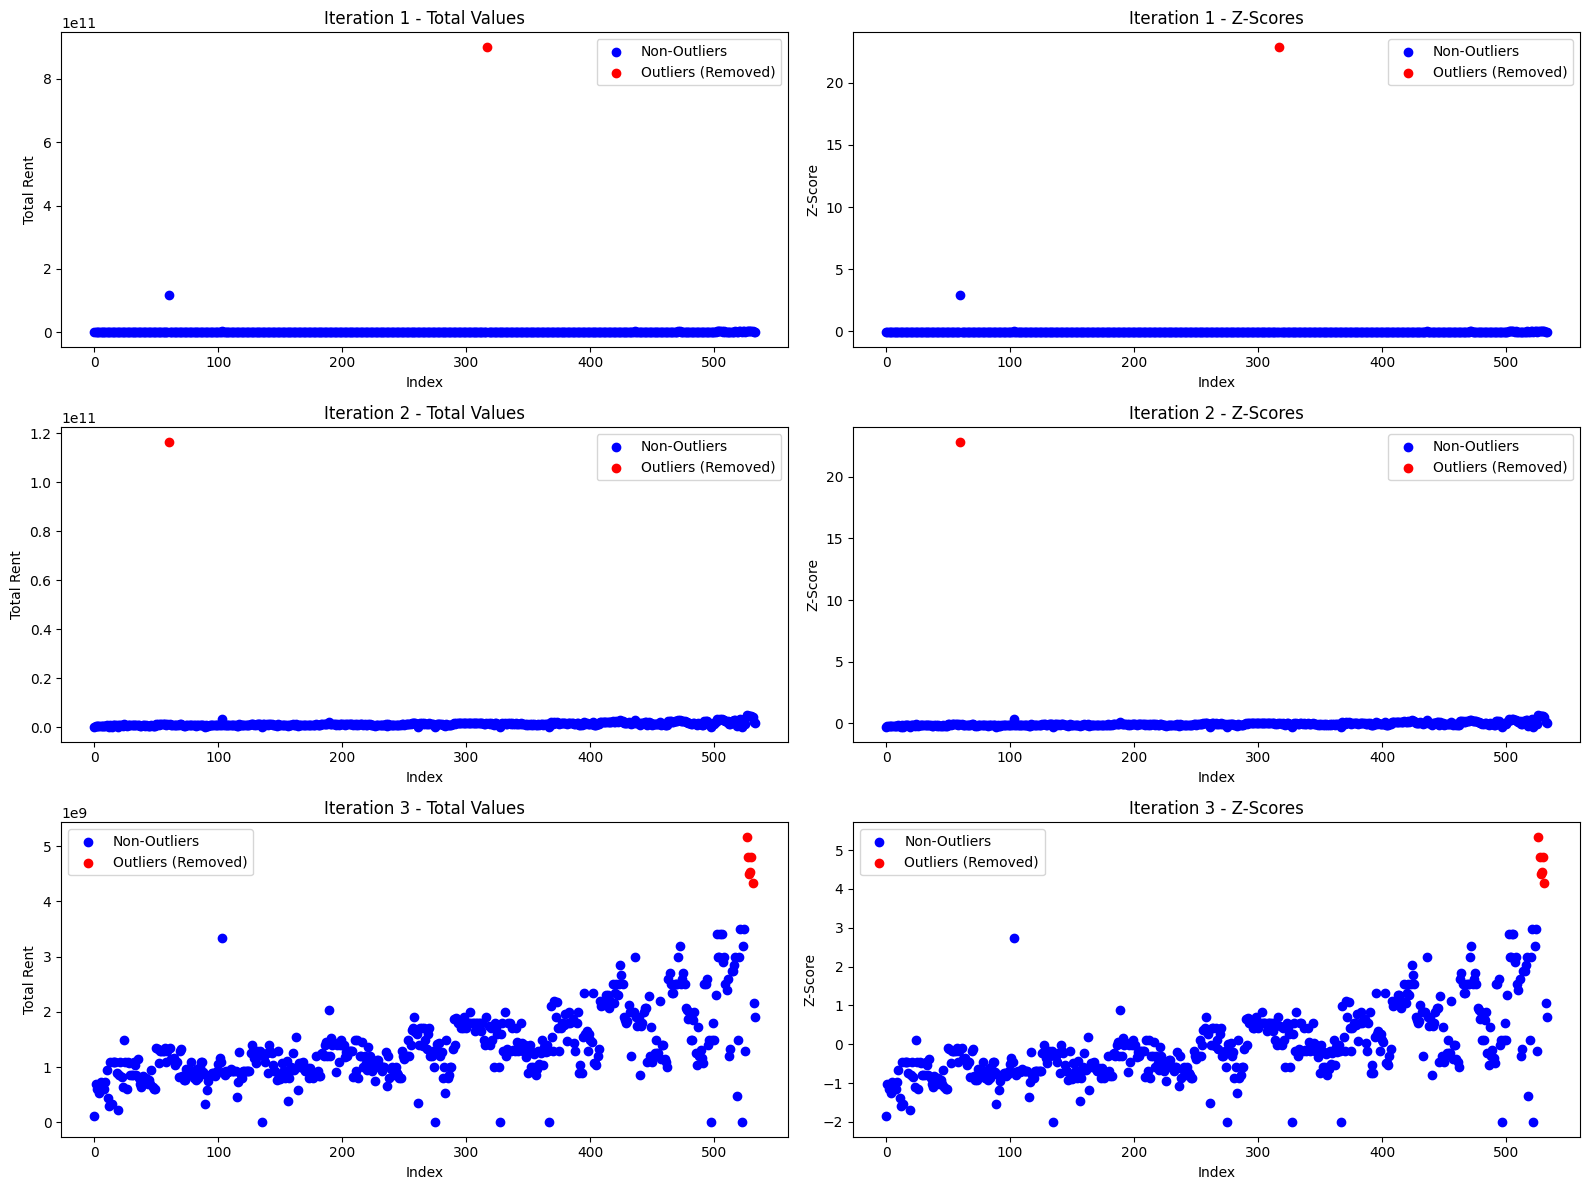

In [55]:
# Visualize the outlier removal process over 3 iterations
df_cleaned = remove_outliers_visualize(df, iterations=3)

In [57]:
# Display the cleaned data
df_cleaned

,id,title,rent,deposit,total,rooms,size,building_age
0,1,اجاره میز برای ناخنکار و ‌مژه کار,3500000,0,116666666,یک,0-9,15-19
1,2,مطهری یوسفیان / ۴۲ متر / تک خواب / بازسازی شده,6000000,500000000,700000000,یک,40-49,10-14
2,3,آپارتمان ۴۰ متری سهروردی,0,600000000,600000000,یک,40-49,15-19
3,4,۴۰ متر نزدیک مترو قدوسی با پارکینگ و اسانسور,10000000,300000000,633333333,یک,40-49,15-19
4,5,۴۵ متر یک خواب طبقه اول شریعتی,9800000,200000000,526666666,یک,40-49,15-19
...,...,...,...,...,...,...,...,...
523,524,۱۸۵ متر نوساز کلید نخوره/ سنایی/ قائم مقام,0,3200000000,3200000000,سه,180-189,0-4
524,525,سهروردی شمالی آپادانا نوبخت بدون مشابه,0,3500000000,3500000000,سه,180-189,0-4
525,526,۱۸۰ متر / ۳ خوابه / سهروردی جنوبی,25000000,450000000,1283333333,سه,180-189,25-29
532,533,200...متر سه خواب پالیزی,35000000,1000000000,2166666666,سه,200-209,20-24


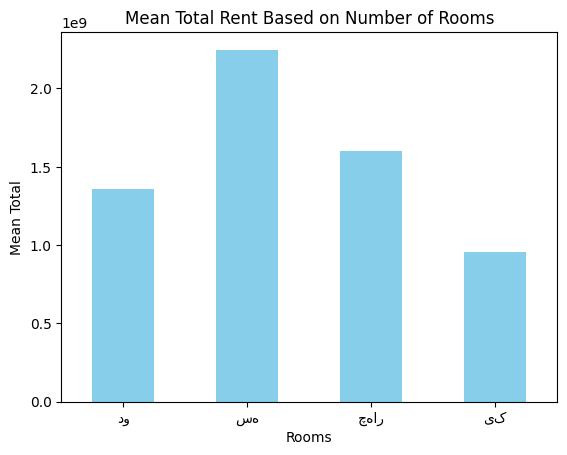

In [56]:
# Calculate mean total based on number of rooms
df_grouped = df_cleaned.groupby('rooms')['total'].mean()

# Plot the mean total by rooms
df_grouped.plot(kind='bar', color='skyblue')
plt.title('Mean Total Rent Based on Number of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Mean Total')
plt.xticks(rotation=0)
plt.show()

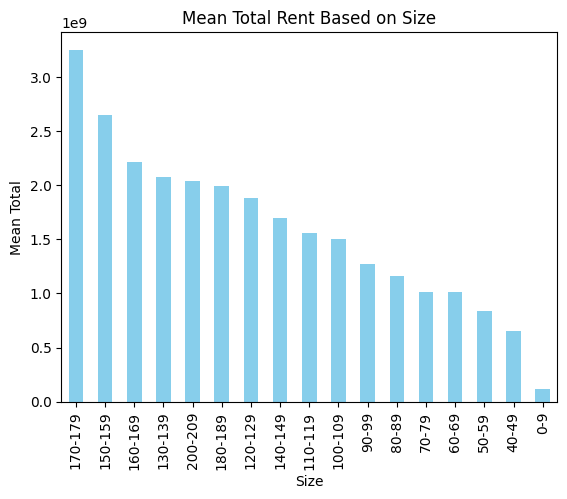

In [62]:
# Calculate mean total based on number of rooms
df_grouped = df_cleaned.groupby('size')['total'].mean()

# Sort the grouped data by total
df_grouped = df_grouped.sort_values(ascending=False)

# Plot the mean total by rooms
df_grouped.plot(kind='bar', color='skyblue')
plt.title('Mean Total Rent Based on Size')
plt.xlabel('Size')
plt.ylabel('Mean Total')
plt.xticks(rotation=90)
plt.show()

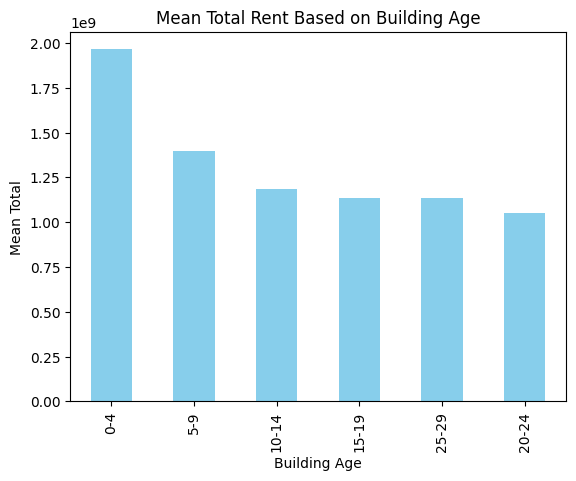

In [63]:
# Calculate mean total based on number of rooms
df_grouped = df_cleaned.groupby('building_age')['total'].mean()

# Sort the grouped data by total
df_grouped = df_grouped.sort_values(ascending=False)

# Plot the mean total by rooms
df_grouped.plot(kind='bar', color='skyblue')
plt.title('Mean Total Rent Based on Building Age')
plt.xlabel('Building Age')
plt.ylabel('Mean Total')
plt.xticks(rotation=90)
plt.show()